In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

In [3]:
from tensorflow.keras.datasets import imdb # tensorflow2.0 comes with keras built in
num_words = 10000 # 10k most common words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
assert train_data.shape == train_labels.shape 
assert test_data.shape == test_labels.shape
print('Size of the training and test (validation) dataset is %s and %s, respectively' %
     (train_data.shape, test_data.shape))

2022-11-24 19:05:10.180690: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Size of the training and test (validation) dataset is (25000,) and (25000,), respectively


In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print('No. of words in the entire dictionary: %s' % len(word_index))

No. of words in the entire dictionary: 88584


## Preview (optional)

In [17]:
i = 0
sentiment = lambda x: 'positive' if x == 1 else 'negative'
print('No. of words of the first review (%s): %s' % (sentiment(train_labels[i]), len(train_data[i])))

No. of words of the first review (positive): 218


In [19]:
# decode and merge
decoded_review = ' '.join([
    # this is simply getting val from dict, imputing with '?' if absent from this dict
    reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

# Turn input and data into tensors

In [5]:
def vectorize_sequences(sequences, dimension=num_words):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
x_train.shape

(25000, 10000)

# Define the model

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model

In [12]:
# from keras import optimizers
# from keras import losses
# from keras import metrics
# model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), 
#               loss=losses.binary_crossentropy,
#               metrics=[metrics.binary_accuracy])

In [13]:
# or more concisely:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Validate the model

In [15]:
no_to_validate = 10000
x_val = x_train[:no_to_validate]
partial_x_train = x_train[no_to_validate:]
y_val = y_train[:no_to_validate]
partial_y_train = y_train[no_to_validate:]

In [16]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5023 - acc: 0.7912 - val_loss: 0.3894 - val_acc: 0.8600
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2997 - acc: 0.9029 - val_loss: 0.3009 - val_acc: 0.8852
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2203 - acc: 0.9294 - val_loss: 0.2812 - val_acc: 0.8862
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1757 - acc: 0.9439 - val_loss: 0.3109 - val_acc: 0.8744
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1417 - acc: 0.9559 - val_loss: 0.2834 - val_acc: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1202 - acc: 0.9641 - val_loss: 0.3210 - val_acc: 0.8784
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0957 - acc: 0.9730 - val_loss: 0.3453 - val_acc: 0.8751
Epoch 8/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0825 - a

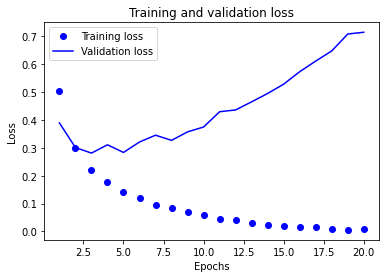

In [17]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

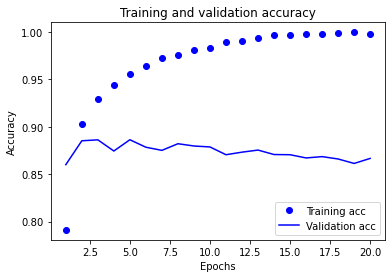

In [18]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Retrain from scratch

In [20]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.4449 - accuracy: 0.8254
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2537 - accuracy: 0.9102
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.1967 - accuracy: 0.9313
Epoch 4/4
782/782 [==============================] - 9s 12ms/step - loss: 0.3180 - accuracy: 0.8752


In [21]:
results

[0.31795233488082886, 0.8752400279045105]

# Generate predictions

In [22]:
model.predict(x_test)

782/782 [==============================] - 21s 27ms/step


array([[0.13387735],
       [0.9997378 ],
       [0.74123716],
       ...,
       [0.07914351],
       [0.04230901],
       [0.45964107]], dtype=float32)

In [23]:
dir(model)

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_spec',
 '_callable_losses',
 '_captured_weight_regularizer',
 '_cast_single_input',
 '_check_call_args',
 '_check_sample_weight_warning',
 '_checkpoint',
 '_check

# ...